# MANIERODESYLABIZATOR

### Importy

In [1]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model

### Funkcje Pomocnicze

In [2]:
slownik = ['a','ą','b','c','ć','d','e','ę','f','g','h','i','j','k','l','ł','m','n','ń','o','ó','p','q','r','s','ś','t','u','x','v','w','y','z','ź','ż']
char_to_int = dict((c, i) for i, c in enumerate(slownik))
max_length = 32

In [3]:
def resizer(X, length):
    if len(X) < length:
        X = X + [0]*(length-len(X))
    else:
        X = X[:length]
    return X

def word_to_indices(word, length):
    indices = [slownik.index(c)+1 for c in word]
    indices = resizer(indices, length)
    return indices

def locate_syllables(locations, length):
    s = [0]*length
    for i in locations:
        s[i] = 1
    return s

### Dane treningowe

In [4]:
# data_file = open("training_set_dummy.txt", "r", encoding="utf-8")
data_file = open("training_set_expert.txt", "r", encoding="utf-8")
data = data_file.read().split("\n")
# remove empty lines
data = [d for d in data if ' ' in d]

words = [word_to_indices(line.split()[0], max_length) for line in data]
X_train = np.zeros((len(words), max_length, len(slownik)))
for i, word in enumerate(words):
    for j, char in enumerate(word):
        if char != 0:
            X_train[i, j, char-1] = 1
# adjust X_train to be 2D for simple dense
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

y_train = [list(map(int, d.split()[1:])) for d in data]
y_train = np.array(y_train)
# print(X_train.shape)
# print(y_train.shape)

(1051, 1120)
(1051, 32)


### Model

In [5]:
def create_model(max_length, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='sigmoid', input_shape=(max_length*len(slownik),)),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(max_length, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### Trening

Epoch 1/50
33/33 [==============================] - 1s 5ms/step - loss: 0.0178 - accuracy: 0.9648
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 0.9638
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9762
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9838
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9734
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.9800
Epoch 7/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 0.9772
Epoch 8/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 0.9772
Epoch 9/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 0.9743
Epoch 10/50
33/33 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 0.9781
Epoch 11/50
33/33 [

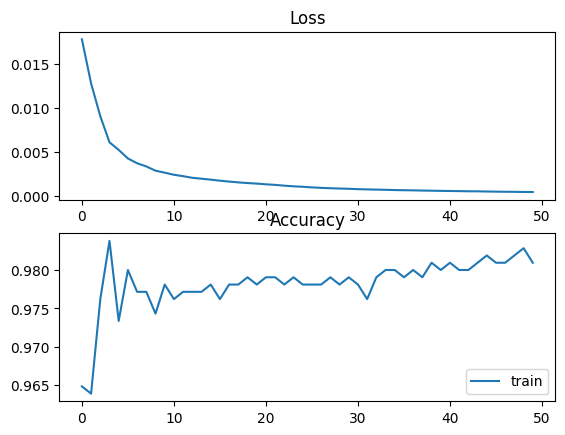

In [6]:
train = input("Train model? (y/n): ")
if train == 'y':
    # create the model
    model = load_model('model_desylabizator.h5')
    # model = create_model(max_length, learning_rate=0.0005)
    # train the model
    history = model.fit(X_train, y_train, epochs=50)
    # save the model
    model.save('model_desylabizator.h5')
    #  plot loss and accuracy
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.legend()
    plt.show()

### Testy

In [7]:
from keras.models import load_model
model = load_model('model_desylabizator.h5')

In [8]:
def test_model(model, input_wrod, max_len):
    X_new = np.zeros((1, max_len, len(slownik)))
    for j, char in enumerate(input_wrod):
        if j == max_len:
            break
        X_new[0, j, char_to_int[char]] = 1
    X_new = X_new.reshape((X_new.shape[0], X_new.shape[1]*X_new.shape[2]))
    
    y_pred = model.predict(X_new)[0]
    y_pred = [int(round(x)) for x in y_pred]
    
    output = []
    for i in range(len(input_wrod)):
        if y_pred[i] == 1:
            output.append('-')
        output.append(input_wrod[i])
    return "".join(output)[1:]

In [12]:
while True:
    word = input("Podaj słowo: ")
    if word == "q":
        break
    print(test_model(model, word, max_length))
    # print(word)

1/1 [==============================] - 0s 17ms/step
-me-cha-ni-ka
1/1 [==============================] - 0s 17ms/step
-re-su-scy-ta-cja
1/1 [==============================] - 0s 20ms/step
-ka-lo-ry-fer
1/1 [==============================] - 0s 20ms/step
-kwan-ty-za-cja
1/1 [==============================] - 0s 18ms/step
-mir-ia-dy
